# Lets first install library for connecting Python and MySql
# and then importing connector

In [1]:
!pip install mysql.connector.python

In [2]:
import mysql.connector

# Connecting MySql with Python

In [3]:
import pandas as pd
con=mysql.connector.connect(
    host="localhost",
    port=3306,
    user="root",
    password="amitk9396",
    database="datatrained")

# the password above is the same which we use in Mysql.
# database is where our table is which we have to use in Python.

In [5]:
df = pd.read_sql_query("select * from studmarks",con)
df

,name,gender,dob,maths,physics,chemistry,english,biology,economics,history,civics
0,John,M,5,55,45,56,87,21,52,89,65
1,Suresh,M,4,75,96,78,64,90,61,58,62
2,Ramesh,M,25,25,54,89,76,95,87,56,74
3,Jessica,F,12,78,96,86,63,54,89,75,45
4,Jennifer,F,2,58,96,78,46,96,77,83,53
5,Annu,F,5,45,87,52,89,55,89,87,52
6,pooja,F,4,55,64,61,58,75,58,64,61
7,Ritesh,M,25,54,76,87,56,25,56,76,87
8,Farha,F,12,55,63,89,75,78,75,63,89
9,Mukesh,M,2,96,46,77,83,58,83,46,77


In [8]:
# lets add 1 column with total marks for each student.

df['TOTAL']=df.iloc[:,3:].sum(axis=1)
df

,name,gender,dob,maths,physics,chemistry,english,biology,economics,history,civics,TOTAL
0,John,M,5,55,45,56,87,21,52,89,65,470
1,Suresh,M,4,75,96,78,64,90,61,58,62,584
2,Ramesh,M,25,25,54,89,76,95,87,56,74,556
3,Jessica,F,12,78,96,86,63,54,89,75,45,586
4,Jennifer,F,2,58,96,78,46,96,77,83,53,587
5,Annu,F,5,45,87,52,89,55,89,87,52,556
6,pooja,F,4,55,64,61,58,75,58,64,61,496
7,Ritesh,M,25,54,76,87,56,25,56,76,87,517
8,Farha,F,12,55,63,89,75,78,75,63,89,587
9,Mukesh,M,2,96,46,77,83,58,83,46,77,566


In [15]:
# lets add 1 column with avg marks for each student.

df['AVG']=df.iloc[:,11]/8
df.head(2)

,name,gender,dob,maths,physics,chemistry,english,biology,economics,history,civics,TOTAL,AVG
0,John,M,5,55,45,56,87,21,52,89,65,470,58.75
1,Suresh,M,4,75,96,78,64,90,61,58,62,584,73.00


In [17]:
# finding shape of data.

df.shape

(10, 13)

In [18]:
# finding types of each column.

df.dtypes

name          object
gender        object
dob            int64
maths          int64
physics        int64
chemistry      int64
english        int64
biology        int64
economics      int64
history        int64
civics         int64
TOTAL          int64
AVG          float64
dtype: object

In [22]:
# Droping column 'dob' as it is of no use.

df.drop(['dob'],axis=1,inplace=True)
df.head(3)

,name,gender,maths,physics,chemistry,english,biology,economics,history,civics,TOTAL,AVG
0,John,M,55,45,56,87,21,52,89,65,470,58.75
1,Suresh,M,75,96,78,64,90,61,58,62,584,73.00
2,Ramesh,M,25,54,89,76,95,87,56,74,556,69.50


In [23]:
# again checking shape after removing 1 column.

df.shape

(10, 12)

In [25]:
# lets see the statical figures.

df.describe()

,maths,physics,chemistry,english,biology,economics,history,civics,TOTAL,AVG
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,59.600000,72.300000,75.300000,69.700000,64.700000,72.700000,69.700000,66.500000,550.500000,68.812500
std,19.460501,20.661559,14.000397,14.453373,26.998148,14.629119,14.453373,14.908983,42.058821,5.257353
min,25.000000,45.000000,52.000000,46.000000,21.000000,52.000000,46.000000,45.000000,470.000000,58.750000
25%,54.250000,56.250000,65.000000,59.250000,54.250000,58.750000,59.250000,55.000000,526.750000,65.843750
50%,55.000000,70.000000,78.000000,69.500000,66.500000,76.000000,69.500000,63.500000,561.000000,70.125000
75%,70.750000,93.750000,86.750000,81.250000,87.000000,86.000000,81.250000,76.250000,585.500000,73.187500
max,96.000000,96.000000,89.000000,89.000000,96.000000,89.000000,89.000000,89.000000,587.000000,73.375000


In [26]:
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt

In [31]:
# Lets see how many students are passed with distinction

df.loc[df['AVG']>=75,['name','gender','AVG']]

,name,gender,AVG


## We can see that none of the students are passed with distinction.

In [28]:
# So Lets check how many of them have passed as 1st class.

df.loc[df['AVG']>=60,['name','gender','AVG']]

,name,gender,AVG
1,Suresh,M,73.000
2,Ramesh,M,69.500
3,Jessica,F,73.250
4,Jennifer,F,73.375
5,Annu,F,69.500
6,pooja,F,62.000
7,Ritesh,M,64.625
8,Farha,F,73.375
9,Mukesh,M,70.750


## From above table we can see that except John, all students are passed as 1st class.

## Lets check missing values and treating them if any

In [29]:
df.isnull().sum()

name         0
gender       0
maths        0
physics      0
chemistry    0
english      0
biology      0
economics    0
history      0
civics       0
TOTAL        0
AVG          0
dtype: int64

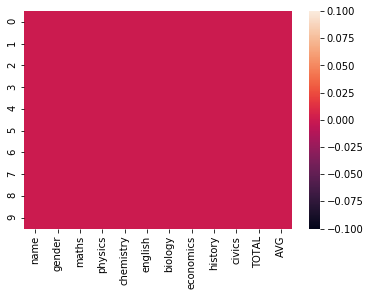

In [30]:
sbn.heatmap(df.isnull())

# We found that there is no null value present in this data

# lets see is there any outliers present in data

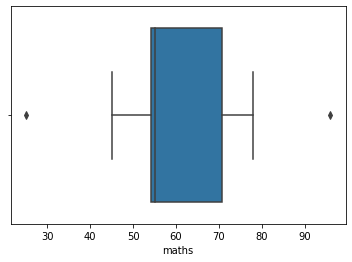

In [43]:
sbn.boxplot(df.maths)

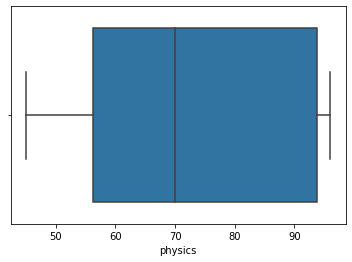

In [45]:
sbn.boxplot(df.physics)

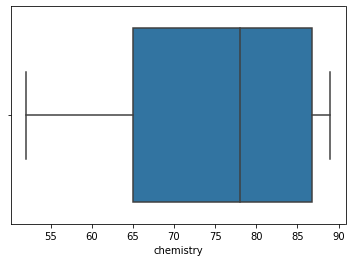

In [46]:
sbn.boxplot(df.chemistry)

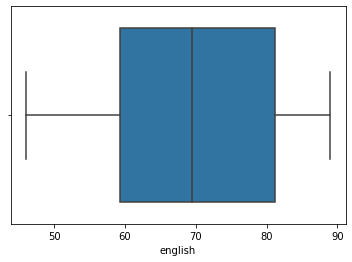

In [47]:
sbn.boxplot(df.english)

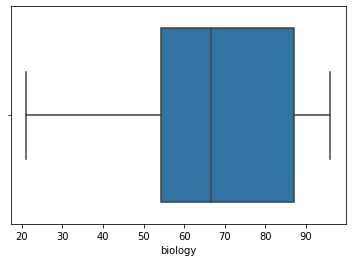

In [48]:
sbn.boxplot(df.biology)

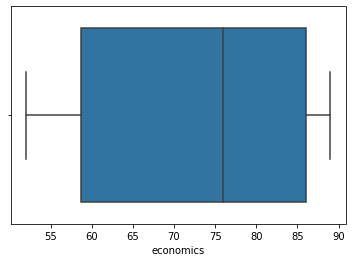

In [49]:
sbn.boxplot(df.economics)

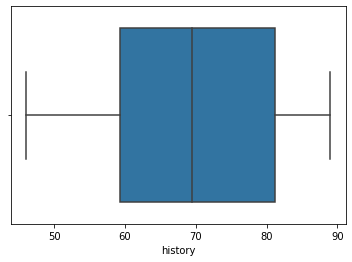

In [50]:
sbn.boxplot(df.history)

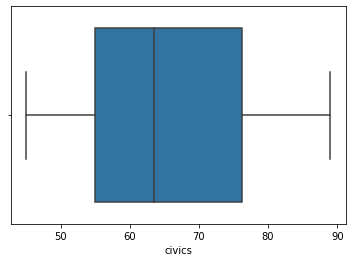

In [51]:
sbn.boxplot(df.civics)

# Checking the Skewness

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F7E2419C88>,
      dtype=object)

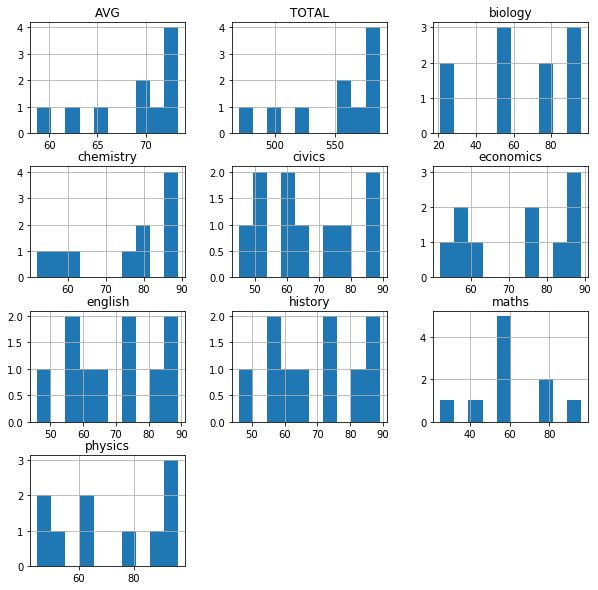

In [65]:
df.hist(figsize=(10,10))

# Finding Correlation

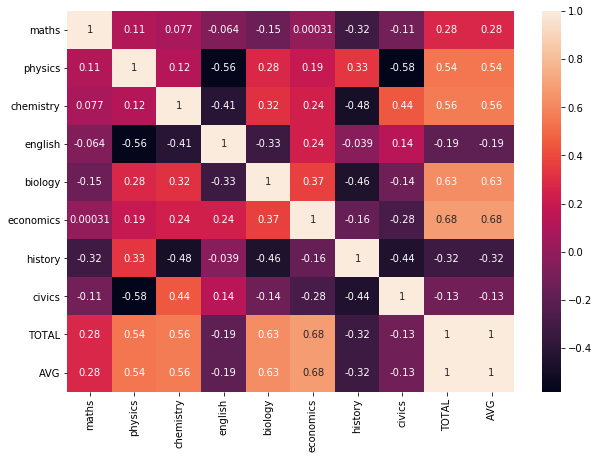

In [58]:
plt.figure(figsize=(10,7))
sbn.heatmap(df.corr(),annot=True)

# Visualisation

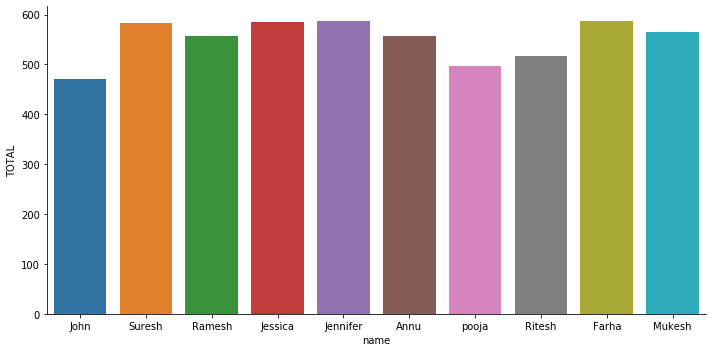

In [73]:
sbn.catplot(x='name',y='TOTAL',kind='bar',data=df,aspect=2)

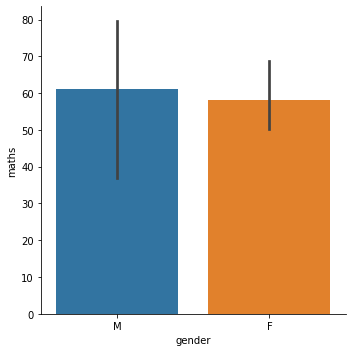

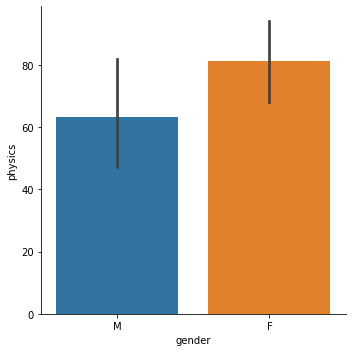

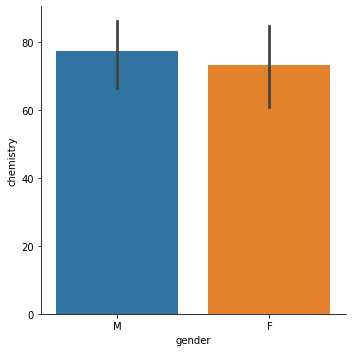

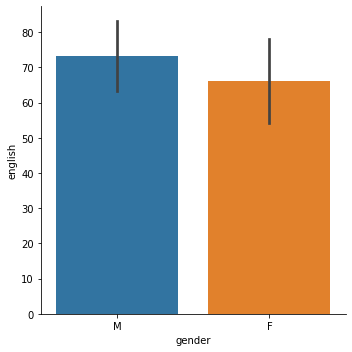

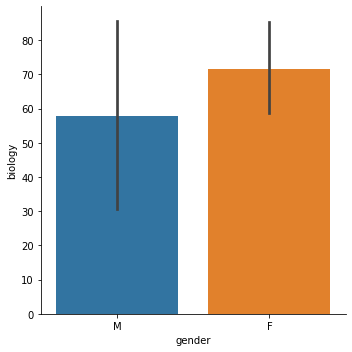

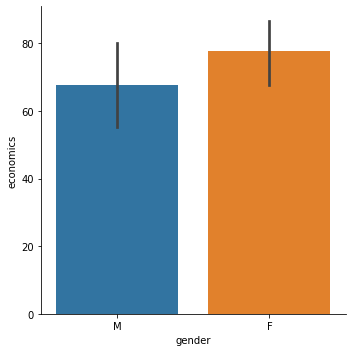

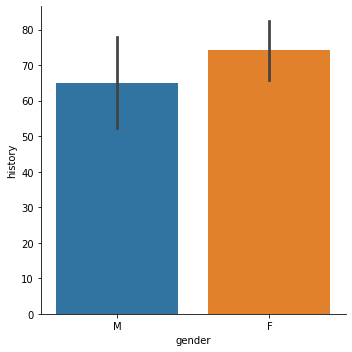

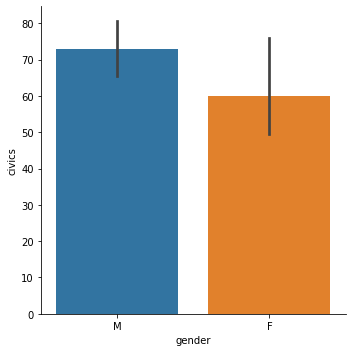

In [72]:
subject=('maths','physics','chemistry','english','biology','economics','history','civics')
for i in subject:
    sbn.catplot(x='gender',y=i,kind='bar',data=df)


# From above we can conclude that
 None of the student got distinction in total marks.
 
 All students are passed with 1st class marks, except 1.
 
 Males scored better then Female in Maths,chemistry,English,Civics.
 
 Females scored better then Male in Physics,Biology,History,Economics.
 